# Flerchinger Longwave from Mark

In [1]:
# netcdf/numpy/xray/stats
import numpy as np
from datetime import datetime, timedelta
import pandas as pd
import xarray as xr
from scipy.stats.stats import pearsonr

# OS interaction
import sys, pickle, os

# import plotting
import seaborn as sns
import matplotlib
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.basemap import Basemap

# Offline Turbulence Package
import turbpy

# Customize
sns.set_style("whitegrid")
sns.set_context('talk')
%matplotlib inline

In [2]:
# --------------------------------------------------------------------------------------------------------------------
# Directory Lists
# Unix
if 'linux' in sys.platform:
    dir_pre = '/home/lapok/gdrive/'
# Mac
elif 'darwin' in sys.platform:
    dir_pre = '/Users/karllapo/gdrive/'

dirProj = dir_pre + 'SnowHydrology/proj/ModTsfc/'
dirPrint = dirProj + 'Graphics'
dirData = dirProj + 'data'

In [71]:
os.chdir(dirData + '/CDP')
LW = xr.open_dataset('LW_ensemble_CDP.nc')
os.chdir(dirData)
CDP = xr.open_dataset('CDP.ModTsfc.nc')

In [15]:
t = np.arange(0, 365, 1/24)
LW['DofWY'] = (('ntime'), t)
LWFlerch = LW.LWmod.isel(nmethod=LW.FLERCHINGER_BEST)

print(LW)

<xarray.Dataset>
Dimensions:              (nflerch: 9, nmethod: 400, ntime: 8760)
Dimensions without coordinates: nflerch, nmethod, ntime
Data variables:
    MONTH                (ntime) int8 10 10 10 10 10 10 10 10 10 10 10 10 10 ...
    DAY                  (ntime) int8 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...
    HOUR                 (ntime) int8 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 ...
    LWmod                (nmethod, ntime) float64 325.2 325.0 325.5 324.5 ...
    LWobs                (ntime) float64 326.5 327.3 328.8 327.5 330.0 332.1 ...
    FLERCHINGER_BEST     (nflerch) int32 1 7 8 9 241 247 248 249 189
    LW_method_clear_sky  (nmethod) int32 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...
    LW_method_all_sky    (nmethod) int32 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 ...
    DofWY                (ntime) float64 0.0 0.04167 0.08333 0.125 0.1667 ...


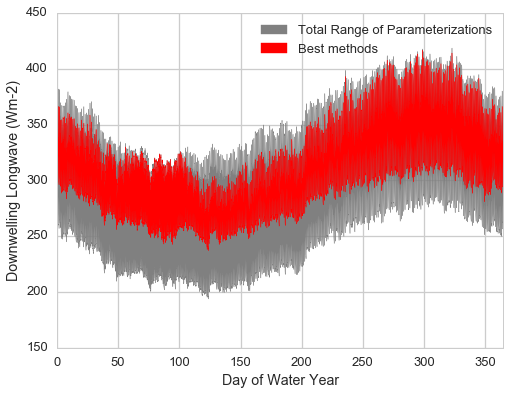

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.fill_between(LW.DofWY, LW.LWmod.min(dim='nmethod'), LW.LWmod.max(dim='nmethod'),
                facecolor='.5', edgecolor='.5', label='Total Range of Parameterizations')
ax.fill_between(LW.DofWY, LWFlerch.min(dim='nmethod'), LWFlerch.max(dim='nmethod'),
                facecolor='r', edgecolor='r', label='Best methods')

ax.set_ylabel('Downwelling Longwave (Wm-2)')
ax.set_xlabel('Day of Water Year')
ax.set_xlim(0, 365)
ax.legend(loc='best')

os.chdir(dirPrint)
fig.savefig('ModTsf.WSC17.CDP_LWMethods.pdf')

In [42]:
# DofWY_bins = np.arange(0, 366, 1)
# DofWY_labels = np.arange(0, 365, 1)
# LW_daily = LW.swap_dims({'ntime': 'DofWY'})
# LW_daily = LW.groupby_bins('DofWY', DofWY_bins, labels=DofWY_labels).mean(dim='DofWY')
d = pd.date_range(datetime(2008, 10, 1), datetime(2009, 9, 30, 23, 0, 0), freq='H')
LW['time'] = (('ntime'), d)
LW = LW.swap_dims({'ntime': 'time'})
LW_daily = LW.resample(freq='D', how='mean', dim='time')

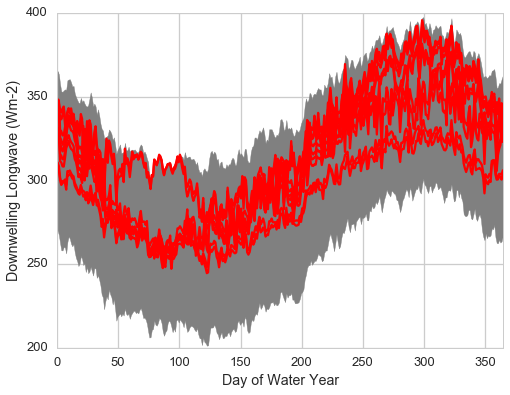

In [70]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.fill_between(LW_daily.DofWY, LW_daily.LWmod.min(dim='nmethod'), LW_daily.LWmod.max(dim='nmethod'),
                facecolor='.5', edgecolor='.5', label='Total Range of Parameterizations')
for indexFlerch in LW.FLERCHINGER_BEST:
    ax.plot(LW_daily.DofWY, LW_daily.LWmod.isel(nmethod=int(indexFlerch.values)), 'r')
ax.plot()

ax.set_ylabel('Downwelling Longwave (Wm-2)')
ax.set_xlabel('Day of Water Year')
ax.set_xlim(0, 365)
# ax.legend(loc='best')

os.chdir(dirPrint)
fig.savefig('ModTsf.WSC17.CDP_LWMethods.pdf')

<xarray.Dataset>
Dimensions:     (time: 103995)
Coordinates:
  * time        (time) datetime64[ns] 1993-11-10 1993-11-10T01:00:00 ...
Data variables:
    Tair        (time) float64 0.66 0.11 0.13 -0.52 -0.38 -0.61 -0.67 -0.71 ...
    QS          (time) float64 0.004486 0.004266 0.004317 0.004117 0.004159 ...
    WIND        (time) float64 0.1 0.5 0.4 0.2 0.1 0.1 0.4 0.8 0.3 0.7 1.0 ...
    precipRain  (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    precipSnow  (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    LWdwn       (time) float64 295.8 259.4 265.6 253.6 245.8 225.6 228.9 ...
    SWdwnDir    (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 18.53 ...
    SWdwnDif    (time) float64 0.278 0.0 0.0 0.278 0.0 0.0 0.0 1.944 20.56 ...
    Press       (time) float64 8.726e+04 8.721e+04 8.719e+04 8.719e+04 ...
    SWdwn       (time) float64 0.278 0.0 0.0 0.278 0.0 0.0 0.0 1.944 20.56 ...
    precip      (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0